# Системи аутоматског управљања - 4. вежбе
## Параметри система у временском и фреквенцијском домену.
## Доминантни полови.

ЗАДАТАК 1.

Нека је дата преносна функција система аутоматског управљања G(s) као:

\begin{equation*}
G(s) =  2\frac{1}{s+1}.
\end{equation*}

а) Одредити јединични одскочни одзив овог система, као и његову амплитудску и фазну карактеристику.

б) Нека је улазни сигнал овог система дефинисан као:

\begin{equation*}
r(t) =  cos(\omega t), \ \omega = 0,1 \frac{rad}{s}.
\end{equation*}


Приказати излазни сигнал c(t) и одредити колико је појачање сигнала r(t).

За оне који желе да знају више:

Приказати како се мења фазни став сигнала c(t) уколико кружна учестаност узима вредности:

\begin{equation*}
 \omega_1 = 0,8\ \frac{rad}{s},\ \omega_2 = 1,3\ \frac{rad}{s}.
\end{equation*}

Напомена: Испитивање система вршити на временском одсечку [0,450] s.

In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#a) Odskocni odziv sistema
Gs = signal.lti([2],[1,1])

In [3]:
t1=np.linspace(0,450,10000)
t11,u11=Gs.step(T=t1)

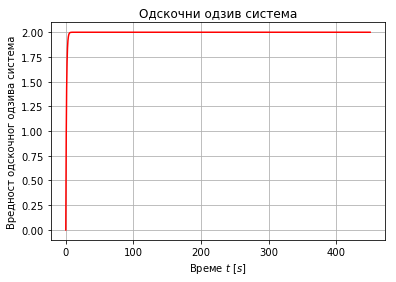

In [4]:
plt.title("Oдскочни одзив система")
plt.ylabel("Вредност одскочног одзива система")
plt.xlabel("Време $\t t\ [s]$")
plt.plot(t11,u11,'r')
plt.grid()
plt.show()

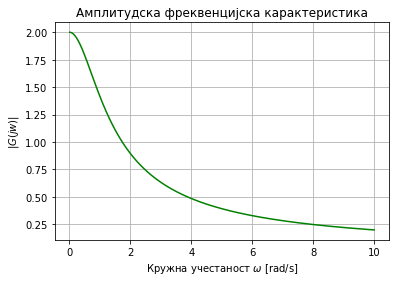

In [5]:
#Amplitudska i frekvencijska karakteristika sistema:
w,Gjw=Gs.freqresp(n=10000)

plt.title("Амплитудска фреквенцијска карактеристика")
plt.ylabel("$|G(jw)|$")
plt.xlabel("Кружна учестаност $\omega$ [rad/s]")
plt.plot(w,sp.absolute(Gjw),'g')
plt.grid()
plt.show()

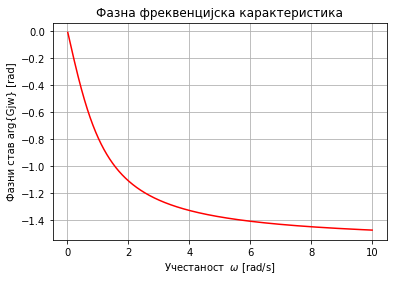

In [6]:
plt.title("Фазна фреквенцијска карактеристика")
plt.ylabel("Фазни став arg{Gjw} [rad]")
plt.xlabel("Учестаност  $\omega$ [rad/s]")
plt.plot(w,sp.arctan(Gjw.imag/Gjw.real), "r")
plt.grid()
plt.show()

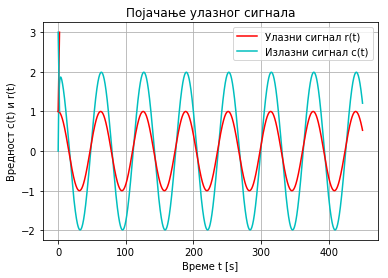

In [45]:
#b) Pojacanje ulaznog signala:
#y(t)=cos(0.1t)
y=np.cos(0.1*t11)

t_odziv,y_odziv,vps=signal.lsim(Gs,y,t11)#Parametar vps trenutno nam nije od interesa ali moramo da ga koristimo zbog same fje


plt.plot(t_odziv[:],y_odziv[:],'c',t11[:],y[:],'r')

plt.title("Појачање улазног сигнала")
plt.ylabel("Вредност c(t) и r(t)")
plt.grid()

gornja,=plt.plot([1,2,3],label='Улазни сигнал r(t)',c=u'r')
donja,=plt.plot([3,2,1],label='Излазни сигнал c(t)', c=u'c')
plt.legend(handles=[gornja,donja])

plt.xlabel("Време t [s]")
plt.show()

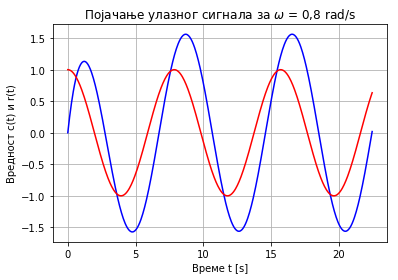

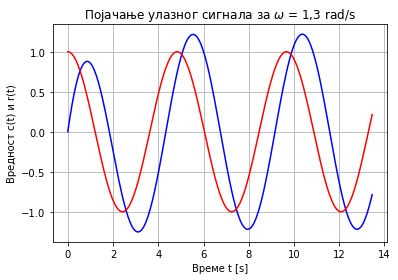

In [55]:
#b)Prikaz promene faznog stava signala u zavisnosti od fazne karakteristike sistema
y1=np.cos(0.8*t11)
t_odziv1,y_odziv1,vps1=signal.lsim(Gs,y1,t11)
#Tamno plavom bojom iscrtavamo vrednost signala c(t) a crvenom vrednost signala r(t).
plt.plot(t_odziv1[:500],y_odziv1[:500],'b',t11[:500],y1[:500],'r')

plt.title("Појачање улазног сигнала за $\omega$ = 0,8 rad/s")
plt.ylabel("Вредност c(t) и r(t)")
plt.xlabel("Време t [s]")
plt.show()
plt.grid()

y2=np.cos(1.3*t11)
t_odziv2,y_odziv2,vps2=signal.lsim(Gs,y2,t11)
#Tamno plavom bojom iscrtavamo vrednost signala c(t) a crvenom vrednost signala r(t).
plt.plot(t_odziv2[:300],y_odziv2[:300],'b',t11[:300],y2[:300],'r')

plt.title("Појачање улазног сигнала за $\omega$ = 1,3 rad/s")
plt.ylabel("Вредност c(t) и r(t)")
plt.xlabel("Време t [s]")
plt.show()
plt.grid()
#Iz amplitudske karakteristike sistema mozemo da odredimo koliko ce biti pojacanje (ili slabljenje)
#ulaznog signala. Iz fazne karakteristike odredjujemo koliko ce biti kasnjenje signala na odredjenoj ucestanosti.

In [9]:
print("Појачање улазног сигнала r(t) је",y1[1]/y2[1],"пута на кружној учестаности од 0,1 rad/s.")

Појачање улазног сигнала r(t) је 1.00106474128 пута на кружној учестаности од 0,1 rad/s.


ЗАДАТАК 2.

Нека је преносна функција система аутоматског управљања G(s) дата као:

\begin{equation*}
G(s) =  400\frac{1}{s^2+ks+4},\ k=1,1
\end{equation*}

а) Одредити одскочни одзив система и време успона.

б) Одредити време кашњења.

в) Одредити време смирења.

г) Одредити фазну и амплитудску фреквенцијску карактеристику одзива система.

д) Одредити прескок.

ђ) Погодним одабиром коефицијента k (у коме је садржан фактор релативног пригушења) смањити прескок да буде мањи од 1%.

е) Одредити пропусни опсег система користећи нову вредност параметра k.

Напомена: Особине система испитивати на временском одсечку [0,45] s.

In [10]:
#а) Odredjujemo odskocni odziv sistema:

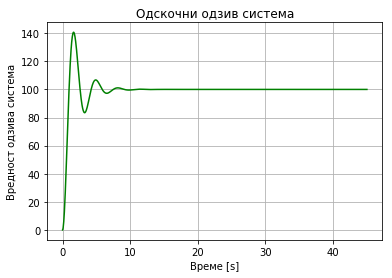

In [11]:
k=1.1 
Gsi=signal.lti([400],[1,k,4])

#Pravimo vremensku osu. Zelimo da pratimo odziv sistema od 0 do 45 sekundi. 
t=np.linspace(0,45,1000)

tsi,usi=Gsi.step(T=t)
plt.plot(tsi,usi,'g')
plt.title("Одскочни одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

In [12]:
#A zatim racunamo vreme uspona.
#Vreme uspona = t(0.9y) - t(0.1y)
#vreme_uspona = 0.9*t_stac-0.1*t_stac

#y_stac=np.average(usi) #da bismo dobili stacionarnu vrednost, treba nam vrednost y u beskonacnosti, dakle srednja vrednpst y  
y_stac = 100

for i in range(0,len(usi)): #na celoj duzini signala usi(t)
 if usi[i]<=0.9*y_stac: #ako je trenutno usi(t) <= od 90% stacionarne vrednosti
    t09=tsi[i] #upisi vrednost vremena u tom trenutku

#poslednje t09 koje bude bilo zapisano bice trazeno t09

for i in range(0,len(usi)):
 if usi[i]<=0.1*y_stac:
    t01=tsi[i]
    
vreme_uspona1 = t09-t01
print("Време успона начин 1.:",round(vreme_uspona1,3), "s.")

#Prethodni kod smo mogli i da resimo samo u dva reda:

vreme_uspona2 = tsi[ usi[:] <= 0.9*y_stac][-1] - tsi[usi[:] <= 0.1*y_stac ][-1]
print("Време успона начин 2.:",round(vreme_uspona2, 3),"s.")


Време успона начин 1.: 3.514 s.
Време успона начин 2.: 3.514 s.


In [13]:
#b)Vreme kasnjenja:
#vreme_kasnjenja = t_stac*0.5

for i in range(0, len(usi)): #Na celoj duzini signala usi(t)
 if usi[i]<=0.5*y_stac: #ako je trenutna vrednost usi(t) <= od 50% stacinarne vrednosti
    t05=tsi[i] #upisi vrednost vremena u tom trenutku

vreme_kasnjenja1=t05
print("Време кашњења начин 1.:",round(vreme_kasnjenja1,3), "s.")

#Prethodni kod smo mogli i da resimo samo u dva reda:

vreme_kasnjenja2=tsi[usi[:]<=0.5*y_stac][-1]
print("Време кашњења начин 2.:",round(vreme_kasnjenja2,3), "s.")

Време кашњења начин 1.: 0.541 s.
Време кашњења начин 2.: 0.541 s.


In [14]:
#v) Vreme smirenja:
#Po definiciji, vreme smirenja smo definisali kao:
#vreme_smirenja |y(t) - y(beskonacno)| <= 0.02y(beskonacno)
#Sada primenjujemo datu definiciju na nase usi(t) (y(t)) i y_stac (y(beskonacno))

#Prvi nacin:
usi2 = usi[::-1]
tsi2 = tsi[::-1]
for i in range (0,len(usi)):
     if (sp.absolute(usi2[i]-y_stac)<=0.02*y_stac):
            vreme_smirenja2=tsi2[i]
     else:
        break
print("Време смирења начин 1.:", round(vreme_smirenja2,3), "s.")

#Drugi nacin:
vreme_smirenja1=sp.absolute(usi[::-1]-y_stac)<=0.02*y_stac
for i in range (0,len(usi)):
    if  (vreme_smirenja1[i]==True & vreme_smirenja1[i+1]==False):
        print("Време смирења начин 2.:", round(tsi[::-1][i-1],3), "s.")
        break



Време смирења начин 1.: 6.982 s.
Време смирења начин 2.: 6.982 s.


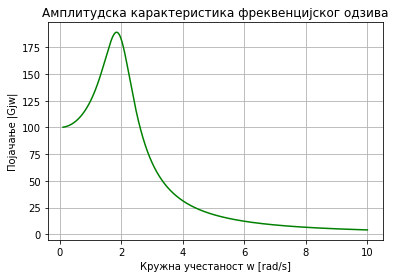

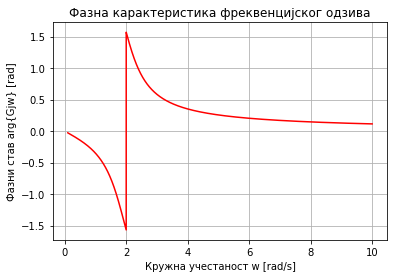

In [15]:
#g) Frekvencijski odziv sistema:
w,Gjw=Gsi.freqresp()

plt.title("Амплитудска карактеристика фреквенцијског одзива")
plt.ylabel("Појачање |Gjw|")
plt.xlabel("Кружна учестаност w [rad/s]")
plt.plot(w,sp.absolute(Gjw),'g')
plt.grid()
plt.show()

plt.title("Фазна карактеристика фреквенцијског одзива")
plt.ylabel("Фазни став arg{Gjw} [rad]")
plt.xlabel("Кружна учестаност w [rad/s]")
plt.plot(w,sp.arctan(Gjw.imag/Gjw.real),"r")#da bismo odredili argument G(jw) koristimo formulu arg{G(jw)} = atan(Im/Re)
plt.grid()
plt.show()

In [16]:
#d) Preskok sistema:
#Preskok smo definisali kao P = (y_maks - y_stac)/y_maks*100 [%].

y_maks=np.max(usi) #vraca nam najvecu vrednost u nizu usi
P=100*(y_maks-y_stac)/y_maks
print("Прескок износи:",round(P,3),"%.")

Прескок износи: 28.928 %.


In [17]:
#dj) Smanjujemo preskok sistema na manje od 1%
k_novo=3.4 
Gsi_novo=signal.lti([400],[1,k_novo,4])

tsi_novo,usi_novo=Gsi_novo.step(T=t)
y_maks=np.max(usi_novo) 

P=100*(y_maks-y_stac)/y_maks
print("Нов прескок износи:",round(P,3),"%.")

Нов прескок износи: 0.625 %.


In [18]:
#e) Propusni opseg novog sistema:
#Definisali smo ga kao: w0: |G(jw0)| = |G(0)|/koren(2).

w,Gjw=Gsi_novo.freqresp()
Gj0=Gjw[0]
w0=w[sp.absolute(Gjw[:])>=sp.absolute(Gj0)/np.sqrt(2)][-1] 
print("Пропусни опсег система износи:",round(w0,3),"rad/s.")

Пропусни опсег система износи: 1.614 rad/s.


ЗАДАТАК 3.

Нека је систем описан функцијом преноса G(s) петог реда:  

\begin{equation*}
G(s) =  64\frac{s+6}{(s^2-2s+4)(s-8)(s^2+8s+40)}.
\end{equation*}

а) Доказати да је систем описан оваквом функцијом преноса нестабилан.

б) Не мењајући апсолутне вредности полиномских константи, подесити полове система тако да постане стабилан. Доказати да је овакав систем стабилан.

в) Функцију преноса под б) апроксимирати функцијом преноса другог реда и приказати квалитет апроксимације. Узети да статичко појачање износи 0,2.

Напомена: Испитивања система вршити на временском одсечку [0,10] s.

In [19]:
#a) Prvo dokazujemo da sistem opsian funkcijom prenosa G(s) nije stabilan: 

In [20]:
#Prvo moramo da izracunamo vrednosti koeficijenata iz brojioca:

brojilac=sp.convolve(sp.convolve([1,-2,4],[1,-8]),[1,8,40])
print(brojilac)

[    1    -2   -20  -272   544 -1280]


In [21]:
#Zatim pravimo objekat klase signal i stvaramo nasu funkciju prenosa G(s):
Gs3=signal.lti([64,64*6],brojilac)

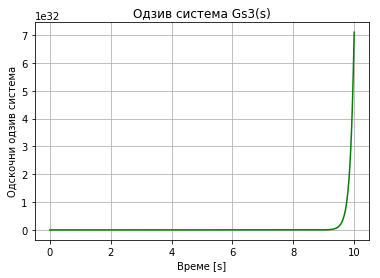

In [22]:
#Pravimo vremensku osu na kojoj vrsimo simulaciju odziva sistema:
t33=np.linspace(0,10,1000)

#Zatim vrednosti odskocnog odziva (vremenska osa i vrednost odziva) unosimo u promenljive t3 i u3:
t3,u3=Gs3.step(T=t33)

plt.plot(t3,u3,'g')
plt.grid()
plt.xlabel("Време [s]")
plt.ylabel("Одскочни одзив система")
plt.title("Одзив система Gs3(s)")
plt.show()

#Vec sada mozemo da pretpostavimo (jos nismo dokazali) da je sistem nestabilan. Da bismo zaista pokazali da je nestabilan
#moramo da proverimo plozaj polova sistema u s kompleksnoj ravni.

In [23]:
#Sada proveravamo polozaj polova sistema.
#Smestamo koordinate imaginarnog dela polova u jw a realnog u sigma.
jw=Gs3.poles.imag
sigma=Gs3.poles.real

In [24]:
#Takodje, zelimo da proverimo da li sistem ima nule i da i njih prikazemo u s kompleksnoj ravni.
Gs3.zeros

array([-6.])

In [25]:
nule_Gs3=Gs3.zeros

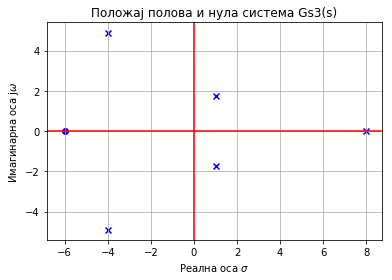

In [26]:
#Zatim iscrtavamo polozaj polova i nula u s kompleksonj ravni sistema.

plt.scatter(sigma,jw,marker="x",c=u'b')
plt.scatter(nule_Gs3,0,marker="o",c=u'b')

plt.axvline(x=0,color='r',linestyle='-')
plt.axhline(y=0,color='r',linestyle='-')

plt.title("Положај полова и нула система Gs3(s)")
plt.xlabel('Реална оса $\sigma$')
plt.ylabel('Имагинарна оса j$\omega$')

plt.grid()
plt.show()
#Mozemo da zakljucimo da nam dva pola izazivaju nestabinost sistema.
#Vidimo da imamo jedan par konjugovano kompleksnih polova i jedan realan pol koji se nalaze u desnoj poluravni.
#Ovim je dokaz zavrsen.

#Zakljucujemo da, ukoliko zelimo da nas sistem postane stabilan, ova dva pola moramo da pomerimo u levu poluravan.

In [27]:
#b) 
#Sada treba da izmenimo nasu funkciju prenosa G(s) tako da sistem koji ona opisuje ima stabilan odziv.
#Kao sto smo rekli treba da dva pola koji se nalaze u desnoj pomerimo u levu poluravan.
#Iz uslova zadtka zakljucujemo da mozemo jedino da promenimo znak ispred polinomske konstante.
#Stoga, treba da pronadjemo koji su to polovi koji izazivaju nestabilnost sistema, i da zatim promenom znaka ispred konstantni
#izvrsimo njihovo pomeranje.

In [28]:
Gs3.poles.real

array([ 8., -4., -4.,  1.,  1.])

In [29]:
Gs3.poles

array([ 8.+0.j        , -4.+4.89897949j, -4.-4.89897949j,  1.+1.73205081j,
        1.-1.73205081j])

In [30]:
#Vidimo da je rec o realnom polu u 8-ici i polu ciji je realan deo u 1-ici (1+1.73j).
#Dakle prvi polinom cija je nula 8 (prvi problematican pol) treba da izmenimo na sledeci nacin:
#(s-8) --> (s+8)
#A za drugi pol zaklucujemo (jednostavnim trazenjem nula polinoma) da treba da ima ovaj oblik:
#(s^2+2s+4)

In [31]:
#Pravimo stoga G_stab(s):

brojilac_stab=sp.convolve(sp.convolve([1,2,4],[1,8]),[1,8,40])
Gs3_stab=signal.lti([64,64*6],brojilac_stab)

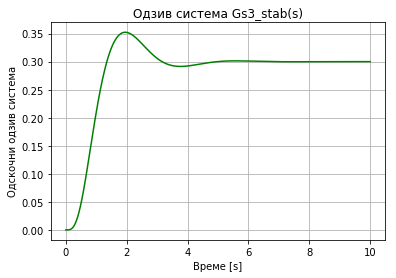

In [32]:
#Iscrtavamo odskocni odziv ovako definisane funkcije prenosa sistema:
t3_stab,u3_stab=Gs3_stab.step(T=t33)

plt.plot(t3_stab,u3_stab,'g')

plt.grid()
plt.xlabel("Време [s]")
plt.ylabel("Одскочни одзив система")
plt.title("Одзив система Gs3_stab(s)")
plt.show()
#Vec mozemo da pretpostavimo da smo sada podesili prenosnu funkciju sistema tako da ima stabilan odziv.
#Medjutim, ovo moramo da dokazemo.

In [33]:
#Dokazujemo nasu pretpostavku iscrtavanjem polozaja nula nove prenosne funkcije sistema:

#Smestamo koordinate imaginarnog dela polova u jw_stab a realnog u sigma_stab.
jw_stab=Gs3_stab.poles.imag
sigma_stab=Gs3_stab.poles.real
nule_Gs3_stab=Gs3.zeros

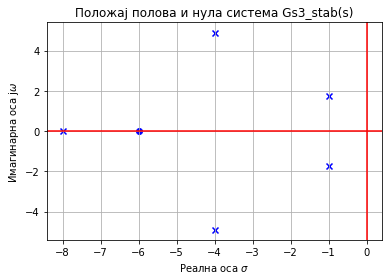

In [34]:
#Zatim iscrtavamo polozaj polova i nula u s ravni sistema sa prenosnom funkcijom G_stab(s).
plt.scatter(sigma_stab,jw_stab,marker="x",c=u'b')
plt.scatter(nule_Gs3,0,marker="o",c=u'b')

plt.axvline(x=0, color='r',linestyle='-')
plt.axhline(y=0, color='r',linestyle='-')

plt.title("Положај полова и нула система Gs3_stab(s)")
plt.xlabel('Реална оса $\sigma$')
plt.ylabel('Имагинарна оса j$\omega$')
plt.grid()
plt.show()
#Vidimo da se sada svi polovi nalaze u levoj poluravni nase prenosne funkcije sistema. Ovim je dokaz zavrsen.

In [35]:
#v) Sada treba da aproksimiramo G_stab(s) (5. reda) sa G_stab_aproks(s) (2. red).
#Iz teorije znamo da cemo aproksimaciju izvristi tako sto cemo da aproksimaciju izvrsimo koristeci dominantne polove.
#Na osnovu teorije znamo da, u ovom slucaju, dominantne polove predstavlja par konjugovano kompleksnih polova sistema
#koji su najblizi imaginarnoj osi (imaju realan deo -1).

In [36]:
Gs3_stab.poles.real

array([-8., -4., -4., -1., -1.])

In [37]:
Gs3_stab.poles

array([-8.+0.j        , -4.+4.89897949j, -4.-4.89897949j, -1.+1.73205081j,
       -1.-1.73205081j])

In [38]:
#Na slican nacin kao u slucaju kada smo pomerali polove, zakljucujemo da u brojiocu prenosne funkcije treba da zadrzimo 
#samo ovaj polinom:
#(s^2+2s+4).

In [39]:
#Sada prikazujemo kvalitet aproksimacije. Posmatramo odziv sistema 5. reda i odziv njegove aproksimacije sistemom 2. reda:

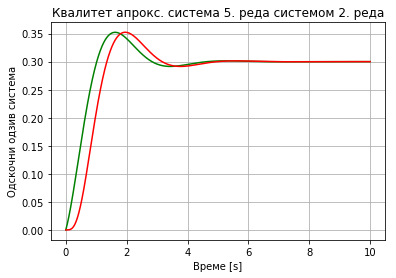

In [40]:
Gs3_stab_aproks=signal.lti([0.2,0.2*6],[1,2,4])

t3_stab_aproks,u3_stab_aproks=Gs3_stab_aproks.step(T=t33)

plt.plot(t3_stab_aproks,u3_stab_aproks,'g') #dominantni polovi
plt.plot(t3_stab,u3_stab,'r') #svi polovi

plt.grid()
plt.xlabel("Време [s]")
plt.ylabel("Одскочни одзив система")
plt.title("Квалитет апрокс. система 5. реда системом 2. реда")
plt.show()

In [41]:
#Vidimo da je razlika u odzivu ova dva sistema na odskocnu pobudu neznatna.